<a href="https://colab.research.google.com/github/aarav2703/HCAHPS--analysis/blob/main/HCAHPS_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/temp data/Patient_survey__HCAHPS__-_Hospital.csv')


In [ ]:
df.drop(['Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent Footnote',
         'Number of Completed Surveys Footnote', 'Survey Response Rate Percent Footnote'], axis=1, inplace=True)
df['Survey Response Rate Percent'] = df['Survey Response Rate Percent'].str.rstrip('%').astype('float') / 100.0
df['Survey Response Rate Percent'] = df['Survey Response Rate Percent'].fillna(df['Survey Response Rate Percent'].median())
df['Patient Survey Star Rating'] = pd.to_numeric(df['Patient Survey Star Rating'], errors='coerce')


In [ ]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


   index  Provider ID                   Hospital Name  \
0      0       320022  PLAINS REGIONAL MEDICAL CENTER   
1      1       320022  PLAINS REGIONAL MEDICAL CENTER   
2      2       320022  PLAINS REGIONAL MEDICAL CENTER   
3      3       320022  PLAINS REGIONAL MEDICAL CENTER   
4      4       320022  PLAINS REGIONAL MEDICAL CENTER   

                               Address    City State  ZIP Code County Name  \
0  2100 N MARTIN LUTHER KING, JR, BLVD  CLOVIS    NM     88101       CURRY   
1  2100 N MARTIN LUTHER KING, JR, BLVD  CLOVIS    NM     88101       CURRY   
2  2100 N MARTIN LUTHER KING, JR, BLVD  CLOVIS    NM     88101       CURRY   
3  2100 N MARTIN LUTHER KING, JR, BLVD  CLOVIS    NM     88101       CURRY   
4  2100 N MARTIN LUTHER KING, JR, BLVD  CLOVIS    NM     88101       CURRY   

   Phone Number      HCAHPS Measure ID  \
0    5757697155    H_CLEAN_STAR_RATING   
1    5757697155   H_CLEAN_LINEAR_SCORE   
2    5757697155           H_COMP_1_U_P   
3    5757697155  H_C

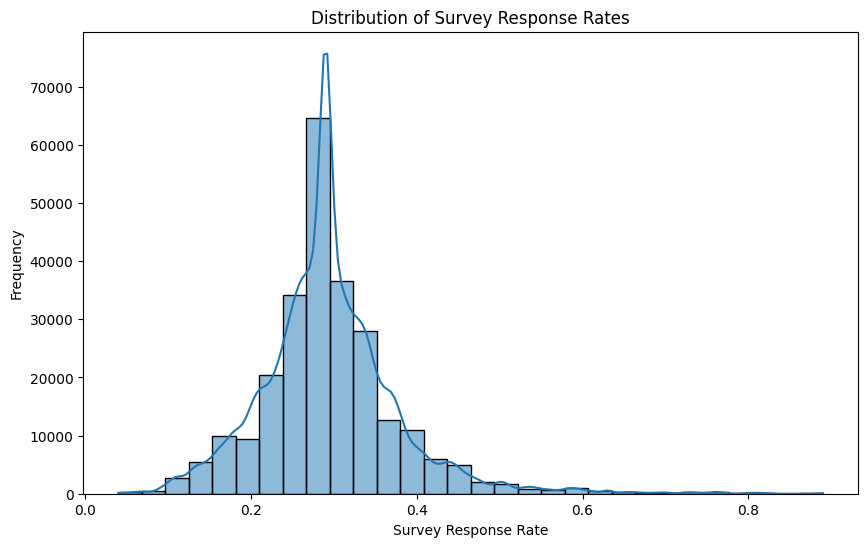

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Survey Response Rate Percent'], bins=30, kde=True)
plt.title('Distribution of Survey Response Rates')
plt.xlabel('Survey Response Rate')
plt.ylabel('Frequency')
plt.savefig('distribution_survey_response_rates.png')
plt.show()


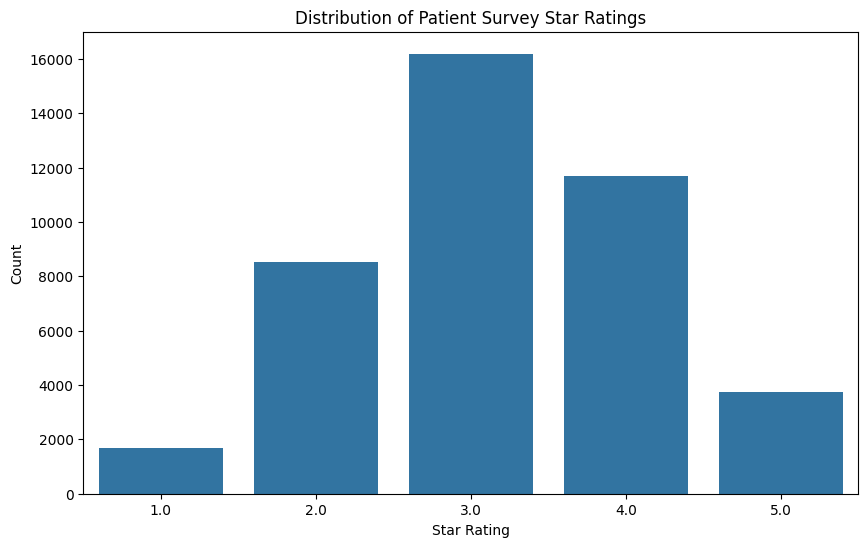

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Patient Survey Star Rating', data=df)
plt.title('Distribution of Patient Survey Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.savefig('distribution_star_ratings.png')
plt.show()


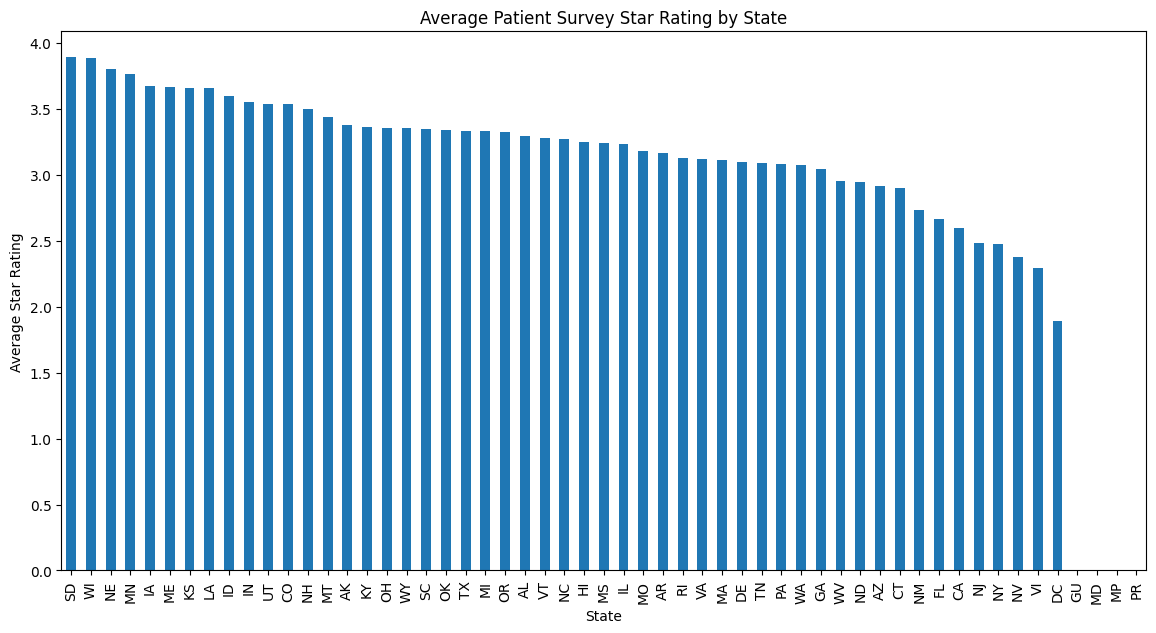

In [ ]:
state_ratings = df.groupby('State')['Patient Survey Star Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
state_ratings.plot(kind='bar')
plt.title('Average Patient Survey Star Rating by State')
plt.xlabel('State')
plt.ylabel('Average Star Rating')
plt.savefig('average_star_ratings_by_state.png')
plt.show()


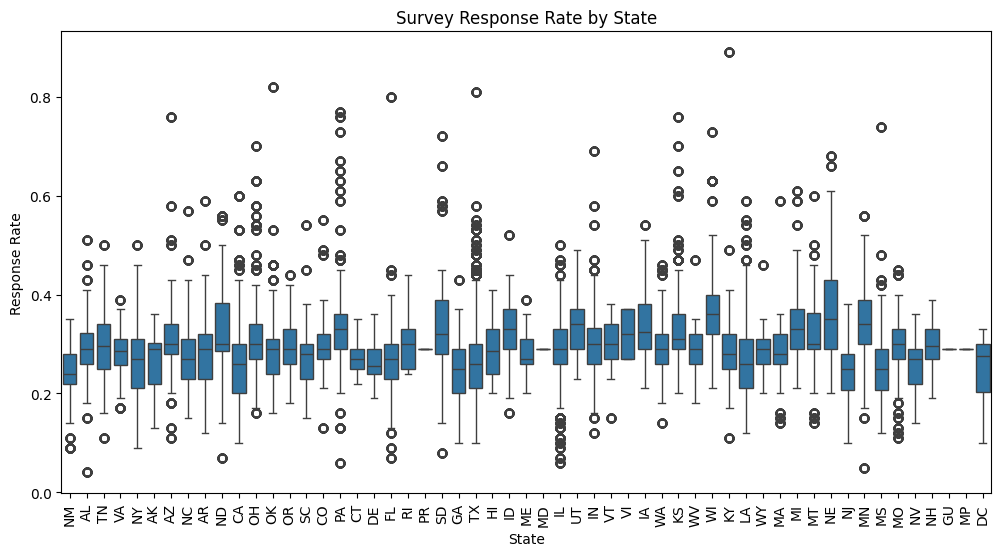

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Survey Response Rate Percent', data=df)
plt.title('Survey Response Rate by State')
plt.xlabel('State')
plt.ylabel('Response Rate')
plt.xticks(rotation=90)
plt.savefig('response_rate_by_state.png')
plt.show()


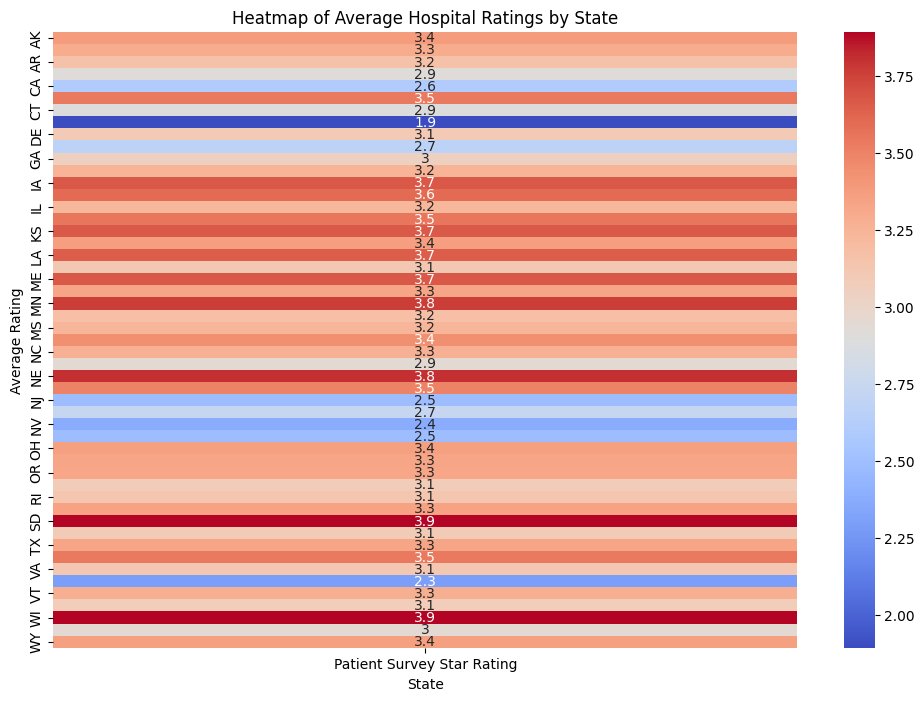

In [ ]:
pivot_table = df.pivot_table(index='State', values='Patient Survey Star Rating', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Average Hospital Ratings by State')
plt.xlabel('State')
plt.ylabel('Average Rating')
plt.savefig('heatmap_ratings_by_state.png')
plt.show()


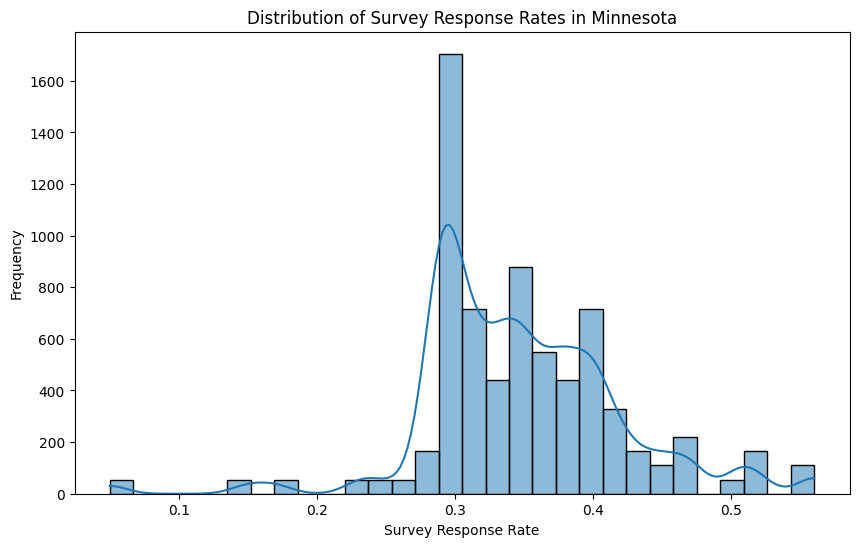

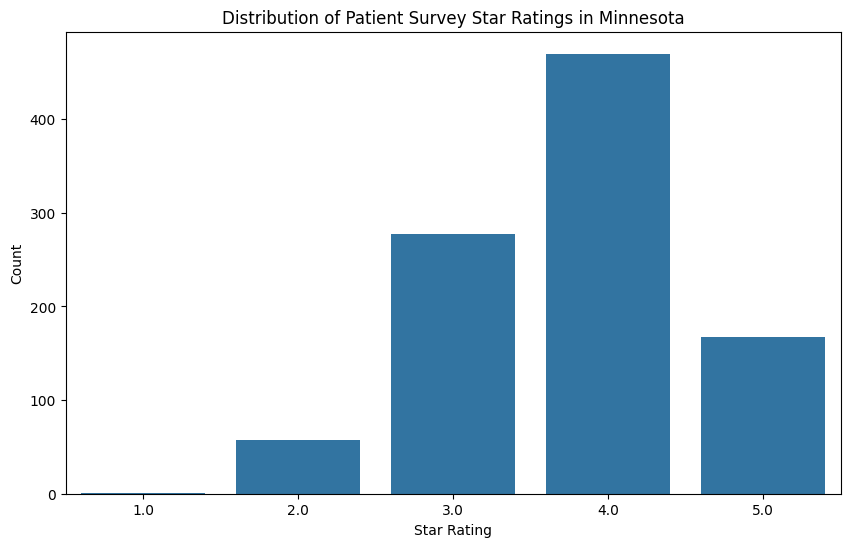

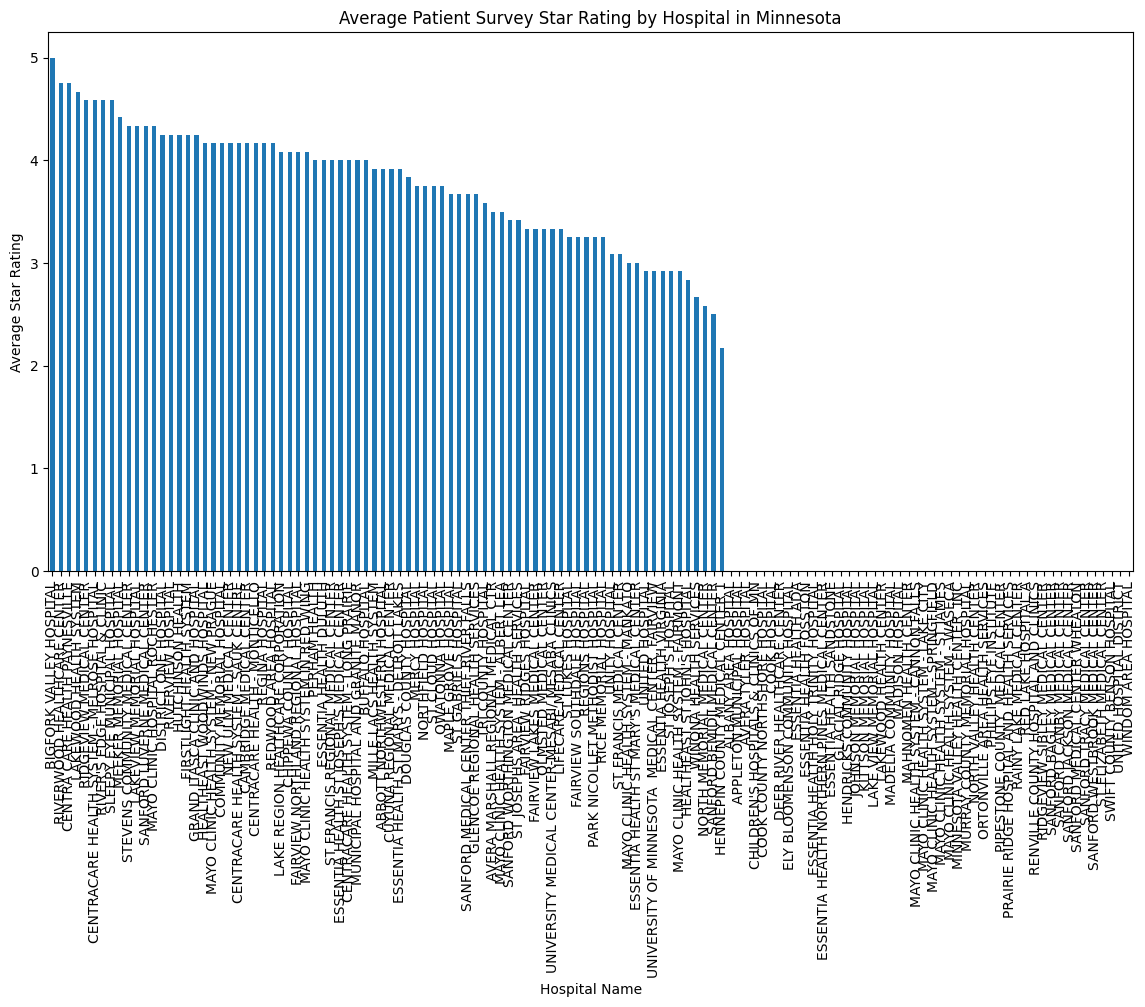

In [ ]:
minnesota_df = df[df['State'] == 'MN']
plt.figure(figsize=(10, 6))
sns.histplot(minnesota_df['Survey Response Rate Percent'], bins=30, kde=True)
plt.title('Distribution of Survey Response Rates in Minnesota')
plt.xlabel('Survey Response Rate')
plt.ylabel('Frequency')
plt.savefig('distribution_survey_response_rates_minnesota.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Patient Survey Star Rating', data=minnesota_df)
plt.title('Distribution of Patient Survey Star Ratings in Minnesota')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.savefig('distribution_star_ratings_minnesota.png')
plt.show()

mn_hospitals_ratings = minnesota_df.groupby('Hospital Name')['Patient Survey Star Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
mn_hospitals_ratings.plot(kind='bar')
plt.title('Average Patient Survey Star Rating by Hospital in Minnesota')
plt.xlabel('Hospital Name')
plt.ylabel('Average Star Rating')
plt.savefig('average_star_ratings_by_hospital_minnesota.png')
plt.show()


In [ ]:
with zipfile.ZipFile('visualizations.zip', 'w') as viz_zip:
    for filename in os.listdir():
        if filename.endswith('.png'):
            viz_zip.write(filename)
            os.remove(filename)

from google.colab import files
files.download('visualizations.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>